### Collocating gridded data with discrete observations

This notebook gives an introduction into collocation of gridded data with observations. Here, AODs of the ECMWF CAMS reanalysis model are compared with global daily observations from the AeroNet V2 (Level 2) for the years of 2010-2018.

#### NOTE
<font color='red'>
    This notebook is currently under development
</font>


#### Import setup and imports

In [1]:
import pyaerocom

start=2000
stop=2018

variables = ["od550aer"]

ts_type = "daily"

model_id = "ECMWF_CAMS_REAN"
obs_id = pyaerocom.const.AERONET_SUN_V2L2_AOD_DAILY_NAME
obs_id

'AeronetSunV2Lev2.daily'

#### Import of model data

In [2]:
model_io = pyaerocom.io.ReadGridded(model_id, start_time=start, stop_time=stop, verbose=False)
print(model_io)

Found match for ID ECMWF_CAMS_REAN
Checking if renamed directory exists
Found directory /lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN/renamed

Pyaerocom ReadGridded
---------------------
Model ID: ECMWF_CAMS_REAN
Available variables: ['ang4487aer', 'od440aer', 'od550aer', 'od550bc', 'od550dust', 'od550oa', 'od550so4', 'od550ss', 'od865aer']
Available years: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 9999]


In [3]:
for var in variables:
    model_io.read_var(var)

In [4]:
print(model_io)


Pyaerocom ReadGridded
---------------------
Model ID: ECMWF_CAMS_REAN
Available variables: ['ang4487aer', 'od440aer', 'od550aer', 'od550bc', 'od550dust', 'od550oa', 'od550so4', 'od550ss', 'od865aer']
Available years: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 9999]

Loaded GriddedData objects:

Pyaerocom GriddedData
---------------------
Variable: od550aer
Temporal resolution: daily
Start / Stop: 2003-01-01T00:00:00.000000 - 2016-12-31T00:00:00.000000


In [5]:
model_data = model_io["od550aer"]

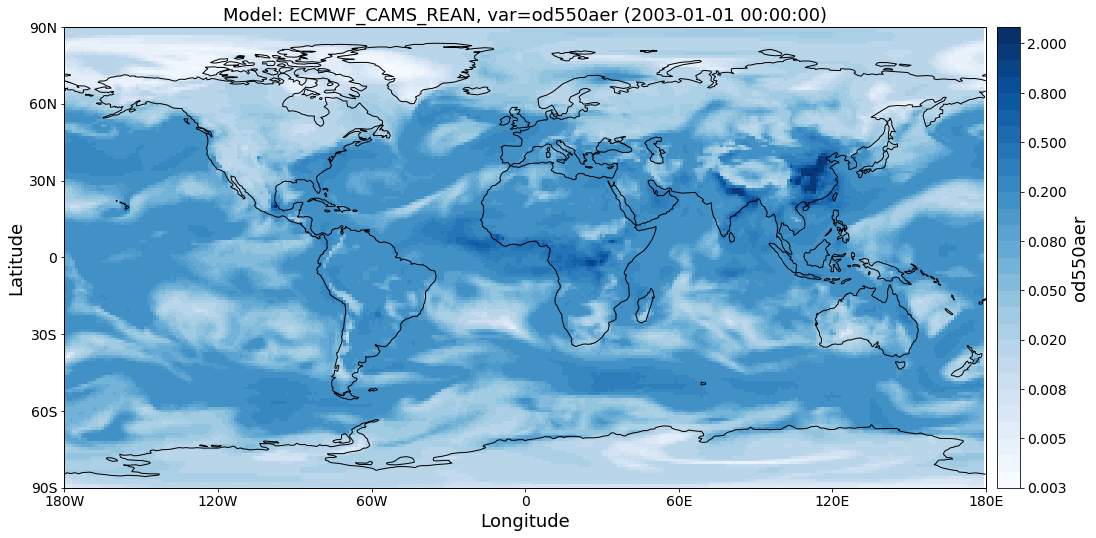

In [6]:
fig = model_data.quickplot_map()

#### Import of AeroNet V2 data (Level 2)

The following cell imports all available data from the AeroNet network. This might take a while in case the data has not been cached before.

In [7]:
obs_data = pyaerocom.io.ReadUngridded(obs_id, verbose=True)
obs_data.read()

Importing from cache file: /home/jonasg/pyaerocom/_cache/AeronetSunV2Lev2.daily_AllYears_AllVars.plk
cache file /home/jonasg/pyaerocom/_cache/AeronetSunV2Lev2.daily_AllYears_AllVars.plk read


Now, extract time series for some stations

In [8]:
lons, lats = obs_data.longitude, obs_data.latitude
model_data

pyaerocom.GriddedData
Grid data: <iris 'Cube' of Aerosol optical depth at 550 nm / (1) (time: 5114; latitude: 161; longitude: 320)>

In [9]:
len(obs_data.metadata.keys())

1028